In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("jamb_exam_results.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in string_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")
    
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
student_id                        int64
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [4]:
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,public,public,public,public,public
school_location,urban,rural,rural,urban,urban
extra_tutorials,yes,no,yes,no,no
access_to_learning_materials,yes,yes,yes,yes,yes
parent_involvement,high,high,high,medium,medium


In [5]:
for column in list(df.dtypes.index):
    print()
    print(column, " ", df[column].dtype)
    print(f"", df[column].nunique())
    print(f"", df[column].unique())


jamb_score   int64
 220
 [192 207 182 210 199 202 251 129 220 157 188 158 191 114 146 154 102 106
 238 274 108 159 263 149 101 153 267 133 147 177 239 181 123 140 144 206
 100 223 266 134 104 172 222 136 185 164 113 189 262 231 151 103 122 135
 170 141 156 227 143 161 226 176 169 196 243 138 155 298 236 201 131 116
 197 110 115 228 225 118 232 215 200 211 218 171 183 245 160 119 107 221
 150 126 120 127 247 234 105 145 198 162 166 224 132 283 121 241 204 229
 268 111 244 163 246 295 168 184 179 190 142 212 299 180 249 128 208 195
 112 216 194 152 117 139 165 130 173 277 240 124 137 281 235 219 282 148
 125 250 255 280 193 174 237 178 254 187 256 167 270 230 109 308 175 214
 285 209 292 279 213 186 261 259 291 278 293 264 275 252 253 217 301 233
 260 271 205 242 294 272 203 276 342 289 269 248 320 346 360 257 366 367
 343 322 258 286 359 290 296 297 288 273 284 265 319 287 304 317 328 362
 335 323 329 355]

study_hours_per_week   int64
 41
 [22 14 29 12 25 35 27 23 15 32  7  2 16 18 40

In [6]:
del df["student_id"]
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,public,public,public,public,public
school_location,urban,rural,rural,urban,urban
extra_tutorials,yes,no,yes,no,no
access_to_learning_materials,yes,yes,yes,yes,yes
parent_involvement,high,high,high,medium,medium


In [7]:
df.parent_education_level = df.parent_education_level.fillna(0)
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

random_state = 1
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

df.shape[0], df_train.shape[0] + df_test.shape[0] + df_val.shape[0]

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.jamb_score.values
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_full_train["jamb_score"]
del df_train["jamb_score"]
del df_val["jamb_score"]
del df_test["jamb_score"]

In [9]:
from sklearn.feature_extraction import DictVectorizer

In [10]:
from sklearn.tree import DecisionTreeRegressor, export_text

max_depth = 1
dicts = df_train.to_dict(orient="records")
dv = DictVectorizer(sparse=True)
X = dv.fit_transform(dicts)
model = DecisionTreeRegressor(max_depth=max_depth)
model.fit(X, y_train)

print(export_text(model, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [12]:
n_estimators = 10
random_state = 1
n_jobs = -1

def train_random_forest(df, y_train, n_estimators, random_state, n_jobs, max_depth=None):
    dicts = df.to_dict(orient="records")
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        random_state=random_state, 
        max_depth=max_depth,
        n_jobs=n_jobs)
    model.fit(X_train, y_train)
    return dv, model

def predict_random_forest(df, dv, model):
    dicts = df.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict(X)
    return y_pred

dv, model = train_random_forest(df_train, y_train, n_estimators, random_state, n_jobs)
y_pred = predict_random_forest(df_val, dv, model)
y_pred
round(root_mean_squared_error(y_val, y_pred), 2)

np.float64(42.14)

In [13]:
random_state = 1
rmses = []
for n in range(10, 201, 10):
    dv, model = train_random_forest(df_train, y_train, n, random_state, n_jobs)
    y_pred = predict_random_forest(df_val, dv, model)
    y_pred
    rmse = round(root_mean_squared_error(y_val, y_pred), 3)
    rmses.append((n, rmse))

rmses

[(10, np.float64(42.137)),
 (20, np.float64(41.461)),
 (30, np.float64(41.106)),
 (40, np.float64(40.917)),
 (50, np.float64(40.852)),
 (60, np.float64(40.784)),
 (70, np.float64(40.677)),
 (80, np.float64(40.539)),
 (90, np.float64(40.504)),
 (100, np.float64(40.517)),
 (110, np.float64(40.593)),
 (120, np.float64(40.625)),
 (130, np.float64(40.651)),
 (140, np.float64(40.595)),
 (150, np.float64(40.597)),
 (160, np.float64(40.604)),
 (170, np.float64(40.628)),
 (180, np.float64(40.641)),
 (190, np.float64(40.631)),
 (200, np.float64(40.601))]

In [14]:
df_rmse = pd.DataFrame(rmses, columns=["n_estimators", "rmse"])
df_rmse

,n_estimators,rmse
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


In [15]:
idmin = df_rmse.rmse.idxmin()
min_rmse_n = df_rmse.iloc[idmin].n_estimators
min_rmse = round(df_rmse.iloc[idmin].rmse, 3)
min_rmse_n

np.float64(90.0)

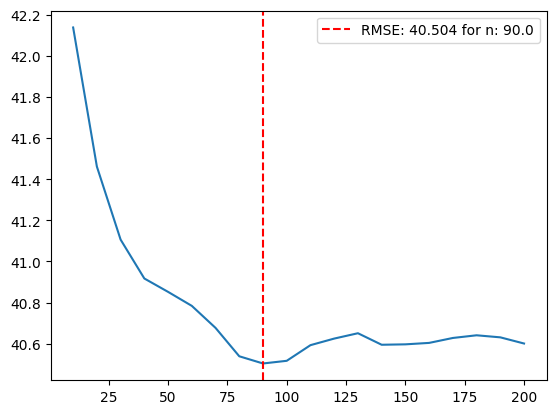

In [16]:
plt.plot(df_rmse.n_estimators, df_rmse.rmse)
plt.axvline(x=min_rmse_n, color='red', linestyle="--", label=f"RMSE: {min_rmse} for n: {min_rmse_n}")
plt.legend()

In [ ]:
n_jobs = -1
random_state = 1
depths = [10, 15, 20, 25]
n_estimators = range(10, 201, 10)
rmses = []
mean_rmse_per_depth = []
for max_depth in depths:        
    rmse_for_depth = []
    for n in n_estimators:        
        dv, model = train_random_forest(
            df_train, 
            y_train, 
            n_estimators=n, 
            random_state=random_state, 
            n_jobs=n_jobs, 
            max_depth=max_depth
        )
        y_pred = predict_random_forest(df_val, dv, model)
        y_pred
        rmse = root_mean_squared_error(y_val, y_pred)
        rmses.append((n, max_depth, rmse))
        rmse_for_depth.append(rmse)

    mean_rmse = np.mean(rmse_for_depth)
    mean_rmse_per_depth.append((max_depth, mean_rmse))

rmses

In [ ]:
mean_rmse_per_depth